**Arbres pour la classification**

In [1]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [2]:
X = [[0, 0], [1, 1]]
y = [0, 1]

In [3]:
clf = clf.fit(X, y)

La prédiction sur de nouveaux échantillons se fait de façon habituelle avec .predict(X) :

In [4]:
clf.predict([[2., 2.]])

array([1])

On peut aussi prédire la probabilité de chaque classe pour un échantillon (qui est calculée comme la fraction de données d’apprentissage dans chaque feuille) :

In [5]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

**Classification des données Iris**

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

Calculer les statistiques (moyenne et écart-type) des quatre variables explicatives : longueur de sépale, largueur de sépale, longueur de pétale et largeur de pétale.

In [7]:
import scipy
scipy.stats.describe(iris.data[:,:5])

DescribeResult(nobs=np.int64(150), minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

Combien y a-t-il d’exemples de chaque classe ?

In [8]:
import numpy as np
np.bincount(iris.target)

array([50, 50, 50])

Avant de construire le modèle, séparons le jeu de données en deux : 70% pour l’apprentissage, 30% pour le test.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

Nous pouvons désormais construire un arbre de décision sur ces données :

In [10]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

Une fois l’apprentissage terminé, nous pouvons visualiser l’arbre, soit avec matplotlib en passant par la méthode plot_tree, soit avec l’outil graphviz (commande dot). Par exemple, avec matplotlib :

[Text(0.4, 0.9, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

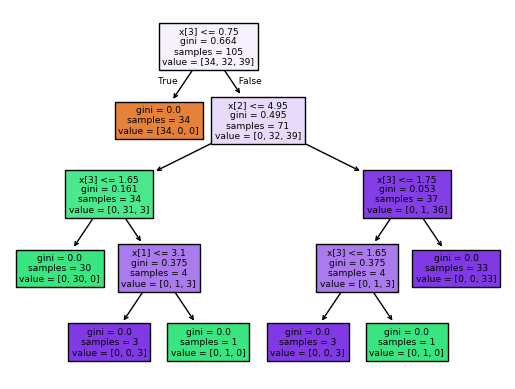

In [11]:
tree.plot_tree(clf, filled=True)

Alternativement, il est possible de faire un export en produisant un fichier .dot qui est le format par défaut de graphviz :

In [12]:
# On exporte le graphe dans le fichier iris.dot
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, filled=True)

Une fois le modèle construit, il est possible de l’utiliser pour la prédiction sur de nouvelles données :

In [13]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

On peut de cette façon calculer le score en test :

In [14]:
clf.score(X_test, y_test)

0.9777777777777777

Changez les valeurs de parametres max_depth et min_samples_leaf :

Le paramètre max_depth est un seuil sur la profondeur maximale de l’arbre. Le paramètre min_samples_leaf donne le nombre minimal d’échantillons dans un nœud feuille. Ils permettent de mettre des contraintes sur la construction de l’arbre et donc de contrôler indirectement le phénomène de sur-apprentissage.

In [15]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

[Text(0.375, 0.875, 'x[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

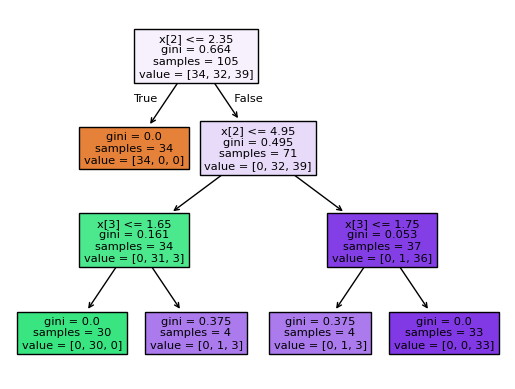

In [16]:
tree.plot_tree(clf, filled=True)

In [17]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 20)
clf.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",20
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curr

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

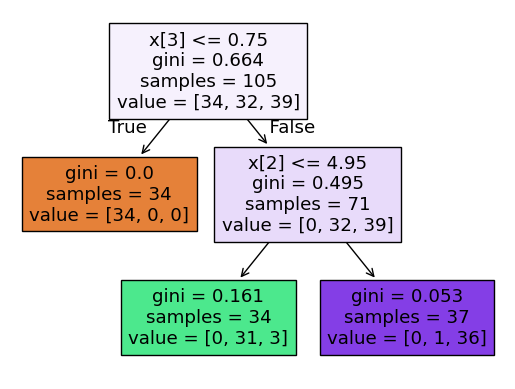

In [18]:
tree.plot_tree(clf, filled=True)

Le problème ici étant particulièrement simple, refaites une division apprentissage/test avec 5% des données en apprentissage et 95% test.

Calculez le taux d’éléments mal classifiés sur l’ensemble de test.

Faites varier (ou mieux, réalisez une recherche par grille avec GridSearchCV) les valeurs des paramètres max_depth et min_samples_leaf pour mesurer leur impact sur ce score.

In [19]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.95, random_state=0)

In [20]:
for mdepth in [1, 2, 3, 4, 5, 6, 7]:
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.6573426573426573
0.8881118881118881
0.7062937062937062
0.8881118881118881
0.7552447552447552
0.7062937062937062
0.7062937062937062


In [21]:
for msplit in [2, 3, 5, 10, 15, 20]:
    clf = tree.DecisionTreeClassifier(min_samples_split=msplit)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.7062937062937062
0.6643356643356644
0.6573426573426573
0.32167832167832167
0.32167832167832167
0.32167832167832167


Pour chercher de bonnes valeurs pour les paramètres on peut utiliser la validation croisée avec GridSearchCV :

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
    test_size=0.30, random_state=0)

In [23]:
from sklearn.model_selection import GridSearchCV
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

0.9777777777777777

**Affichage de la surface de décision**

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

In [26]:
# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]

In [27]:
# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

In [28]:
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

C:\Users\matthieu.catteyfaye\AppData\Local\Temp\ipykernel_12256\3908983885.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


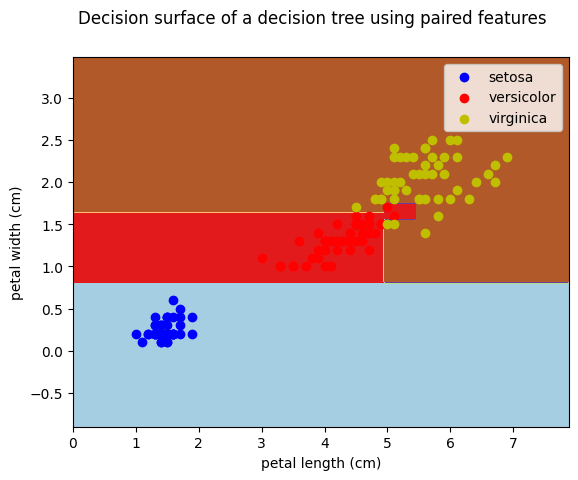

In [29]:
# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

(np.float64(0.0),
 np.float64(7.88),
 np.float64(-0.9),
 np.float64(3.4800000000000044))

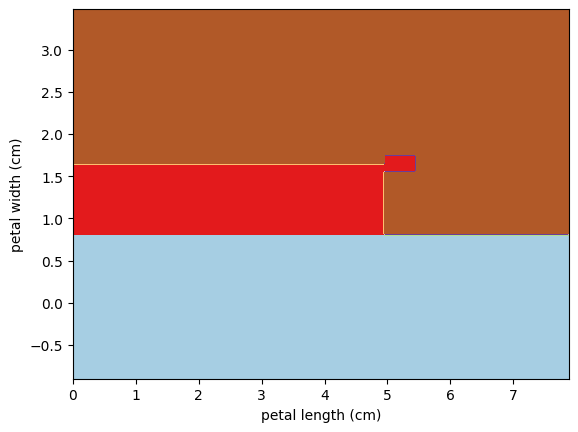

In [30]:
# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

C:\Users\matthieu.catteyfaye\AppData\Local\Temp\ipykernel_12256\3225202749.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


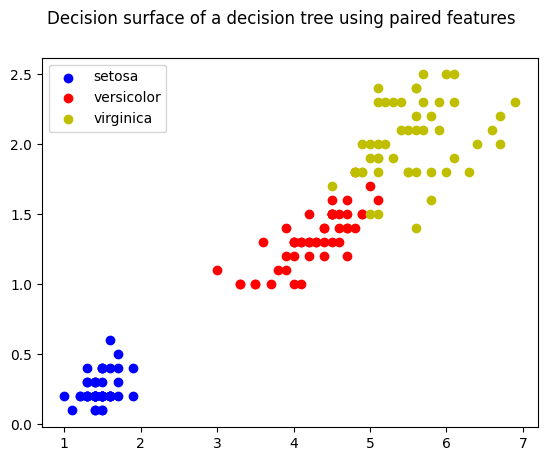

In [31]:
# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

Refaire l’affichage pour les autres paires d’attributs : 

In [32]:
pair = [0,1]

C:\Users\matthieu.catteyfaye\AppData\Local\Temp\ipykernel_12256\2946458368.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


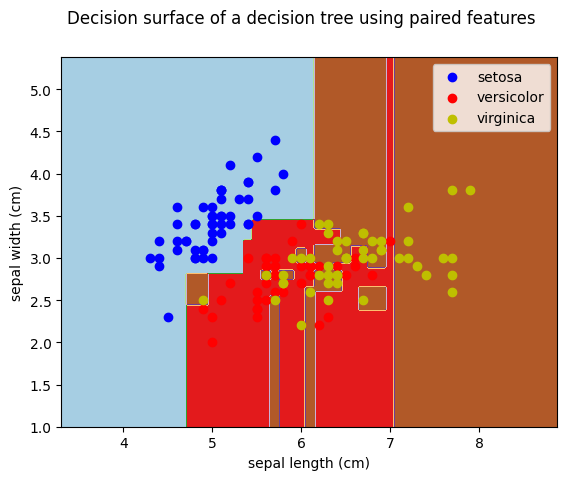

In [33]:
X = iris.data[:, pair]
y = iris.target

clf = tree.DecisionTreeClassifier().fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [34]:
pair = [0, 2]

C:\Users\matthieu.catteyfaye\AppData\Local\Temp\ipykernel_12256\2946458368.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


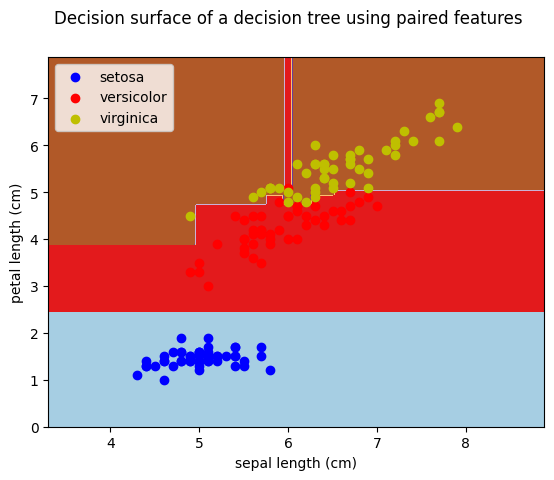

In [35]:
X = iris.data[:, pair]
y = iris.target

clf = tree.DecisionTreeClassifier().fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [36]:
pair = [0, 3]

C:\Users\matthieu.catteyfaye\AppData\Local\Temp\ipykernel_12256\2946458368.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


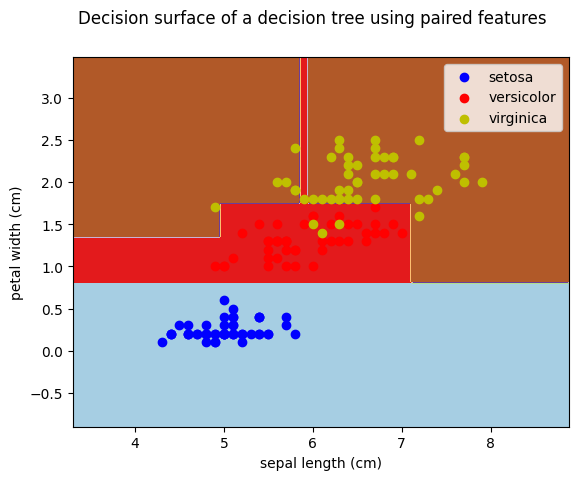

In [37]:
X = iris.data[:, pair]
y = iris.target

clf = tree.DecisionTreeClassifier().fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [38]:
pair = [1, 2]

C:\Users\matthieu.catteyfaye\AppData\Local\Temp\ipykernel_12256\2946458368.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


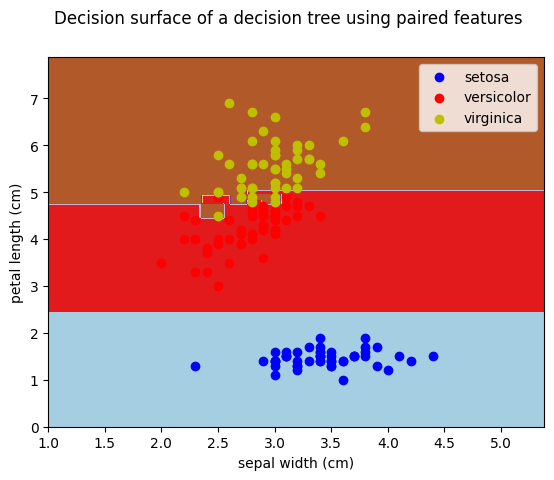

In [39]:
X = iris.data[:, pair]
y = iris.target

clf = tree.DecisionTreeClassifier().fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [40]:
pair = [1, 3]

C:\Users\matthieu.catteyfaye\AppData\Local\Temp\ipykernel_12256\2946458368.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


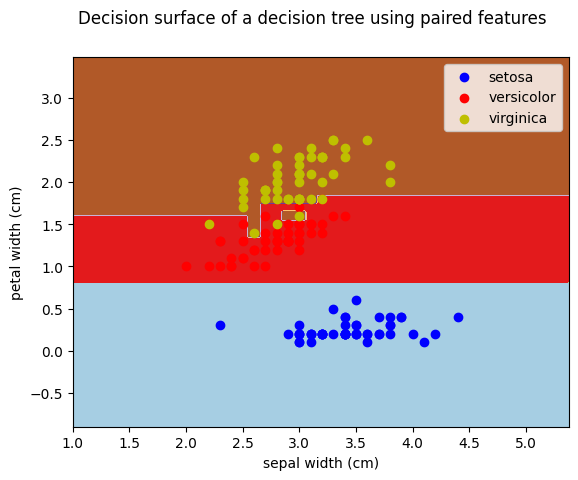

In [41]:
X = iris.data[:, pair]
y = iris.target

clf = tree.DecisionTreeClassifier().fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [42]:
pair = [2, 1]

C:\Users\matthieu.catteyfaye\AppData\Local\Temp\ipykernel_12256\2946458368.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


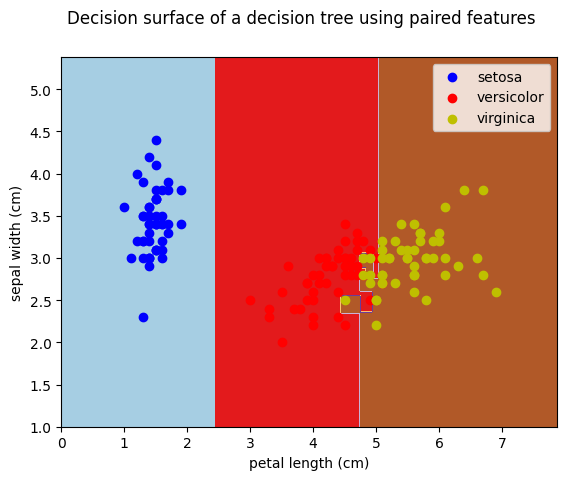

In [43]:
X = iris.data[:, pair]
y = iris.target

clf = tree.DecisionTreeClassifier().fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

La séparation entre les classes est plus marquée avec la paire [2, 3].
Elle est aussi visible avec les paires [1, 2] et [1, 3].